<a href="https://colab.research.google.com/github/happydinnertime/2018-summer-camp/blob/master/%E5%AD%97%E5%85%B8%E8%88%87%E6%96%B7%E8%A9%9E%E5%B7%A5%E5%85%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**working on 中研院斷詞系統**

另記：

1. 關於傑巴（Jieba）的斷詞系統，字體仍是個問題－－並未成為系統字型，每次使用仍需上載－－因此需嘗試連結到 google drive，方便進行訪問。
2. 每次使用時請先確認google drive是否連接，以及當中字體、中研院訓練集之檔案位置。

In [ ]:
import os

# 設定 Google Drive 中的文件路徑
file_path = '/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/data.zip'  # 替換為實際的文件路徑

# 檢查文件是否存在
if os.path.exists(file_path):
    print("文件存在！")
else:
    print("文件不存在。")
#/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/data.zip

文件存在！


In [ ]:
import zipfile

# 解壓縮目標路徑
extract_path = '/content/model'  # 解壓到 Colab 的工作目錄

# 創建解壓目標路徑（如果不存在的話）
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 解壓 ZIP 文件
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"解壓縮完成，文件已解壓到 {extract_path}")

解壓縮完成，文件已解壓到 /content/model


In [ ]:
pip install -U ckiptagger[tf,gdown]

In [ ]:
import os

# 列出解壓目錄中的文件
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))

/content/model/data/LICENSE
/content/model/data/embedding_word/token_list.npy
/content/model/data/embedding_word/vector_list.npy
/content/model/data/embedding_character/token_list.npy
/content/model/data/embedding_character/vector_list.npy
/content/model/data/model_ws/model_asbc_Att-0_BiLSTM-cross-2-500_batch128-run1.meta
/content/model/data/model_ws/model_asbc_Att-0_BiLSTM-cross-2-500_batch128-run1.index
/content/model/data/model_ws/model_asbc_Att-0_BiLSTM-cross-2-500_batch128-run1.data-00000-of-00001
/content/model/data/model_pos/model_asbc_Att-0_BiLSTM-2-500_batch256-run1.index
/content/model/data/model_pos/label_list.txt
/content/model/data/model_pos/model_asbc_Att-0_BiLSTM-2-500_batch256-run1.data-00000-of-00001
/content/model/data/model_pos/model_asbc_Att-0_BiLSTM-2-500_batch256-run1.meta
/content/model/data/model_ner/model_ontochinese_Att-0_BiLSTM-2-500_batch128-run1.meta
/content/model/data/model_ner/label_list.txt
/content/model/data/model_ner/model_ontochinese_Att-0_BiLSTM-2-

In [ ]:
!pip install keras==3.4.1  # Downgrade Keras to version 3.4.1

In [ ]:
import keras
print("Keras version:", keras.__version__)

Keras version: 3.4.1


In [ ]:
!pip install tensorflow==2.10.0
!pip install keras==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

###**模組設置**
**檢查操作區 1**

In [ ]:
from ckiptagger import WS, POS, NER

# 使用解壓縮的模型來初始化 CKIP Tagger
ws = WS("/content/model/data")
#pos = POS("/content/model/data")
#ner = NER("/content/model/data")

# 測試模型
#text = ["台灣大學是一所著名的大學。"]
#word_sages = ws(text)
#pos_tags = pos(word_sages)
#named_entities = ner(word_sages, pos_tags)

#print("分詞結果：", word_sages)
#print("詞性標註結果：", pos_tags)
#print("命名實體識別結果：", named_entities)

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


###**斷詞與統計**
連接至 google drive。

In [ ]:
import os

# 設定 Google Drive 中的文件路徑
file_path = '/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/Microsoftblacktype.ttf'  # 替換為實際的文件路徑

# 檢查文件是否存在
if os.path.exists(file_path):
    print("文件存在！")
else:
    print("文件不存在。")

#/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/SimHei.ttf
#/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/Microsoftblacktype.ttf
#以上位置如有變更，也需更改檔案路線。

文件存在！


**檢查操作區 2**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 創建 FontProperties 對象
font_path = '/content/drive/MyDrive/工作平台/關鍵詞研究/數位研究方法/Microsoftblacktype.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

In [ ]:
!pip install --upgrade wordcloud pillow

In [ ]:
from ckiptagger import WS
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
from wordcloud import WordCloud
from google.colab import files

# 上傳文本文件
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 讀取文件內容
with open(file_name, 'r', encoding='utf-8') as file:
    text = file.read()

# 使用 CKip 分詞
segmented_words = ws([text]) # 將文本作為字串列表傳遞
#print("分詞結果: ", ' | '.join(segmented_words[0])) # 訪問第一個 e

#將 CKip 的陣列改寫成如同傑巴（Jieba）的長字串
flat_list = [item for sublist in segmented_words for item in sublist] #將列表扁平化
segmented_words_string = ' | '.join(flat_list)   # 將一維列表轉換為用特殊符號 ' | ' 分隔的長字串
#print("分詞結果: ", segmented_words_string)

# 停用詞列表（根據需要修改）
stop_words = set(['...', '..', '\n', '\n ', '我們', '一個', '一種', '他們', '不是', '可以', '就是', '這種', '不能', '這些', '所以', '這樣', '一切', '不過', '然而', '對於', '沒有', '什麼', '時候', '所謂', '什麼'])

# 過濾停用詞
filtered_words = [word for word in flat_list if word not in stop_words] # 使用扁平化後的列表

# 過濾掉長度小於2的詞語（根據需要調整）
filtered_words = [word for word in filtered_words if len(word) > 1]

# 保存分詞結果到新文件
output_file = "filtered_segmented_output.txt"
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(" | ".join(filtered_words))

# 計算詞頻
word_counts = Counter(filtered_words)
print(type(word_counts))
print("詞頻最高的30個詞: ", word_counts.most_common(30))

# 繪製詞頻長條圖
labels, values = zip(*word_counts.most_common(30))
plt.figure(figsize=(12, 8))  # 設置圖形大小
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=30)
plt.xlabel('詞彙',fontproperties=font_prop)
plt.ylabel('出現次數',fontproperties=font_prop)
plt.title('詞頻統計',fontproperties=font_prop)
plt.grid(axis='y')
plt.xticks(fontproperties=font_prop)
plt.show()

#生成文字雲
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WORD_CLOUD:')
plt.show()

Saving 「新感覺」新整理.txt to 「新感覺」新整理.txt


KeyboardInterrupt: 

#### **新 CKip 程式（加上詞彙比重）**

Saving 「新感覺」之特輯資源全文.txt to 「新感覺」之特輯資源全文.txt
<class 'collections.Counter'>
詞頻最高的30個詞:  [('我們', 62), ('新感覺', 56), ('主義', 53), ('新感覺派', 46), ('感覺', 40), ('作家', 30), ('對於', 28), ('他們', 28), ('文學', 28), ('藝術', 27), ('作品', 27), ('沒有', 25), ('文藝', 25), ('可以', 23), ('意識', 21), ('生活', 21), ('不能', 20), ('什麽', 20), ('東西', 19), ('這些', 19), ('日本', 19), ('中國', 18), ('所以', 17), ('社會', 17), ('這樣', 17), ('作者', 17), ('一切', 16), ('小說', 15), ('起來', 14), ('先生', 13)]


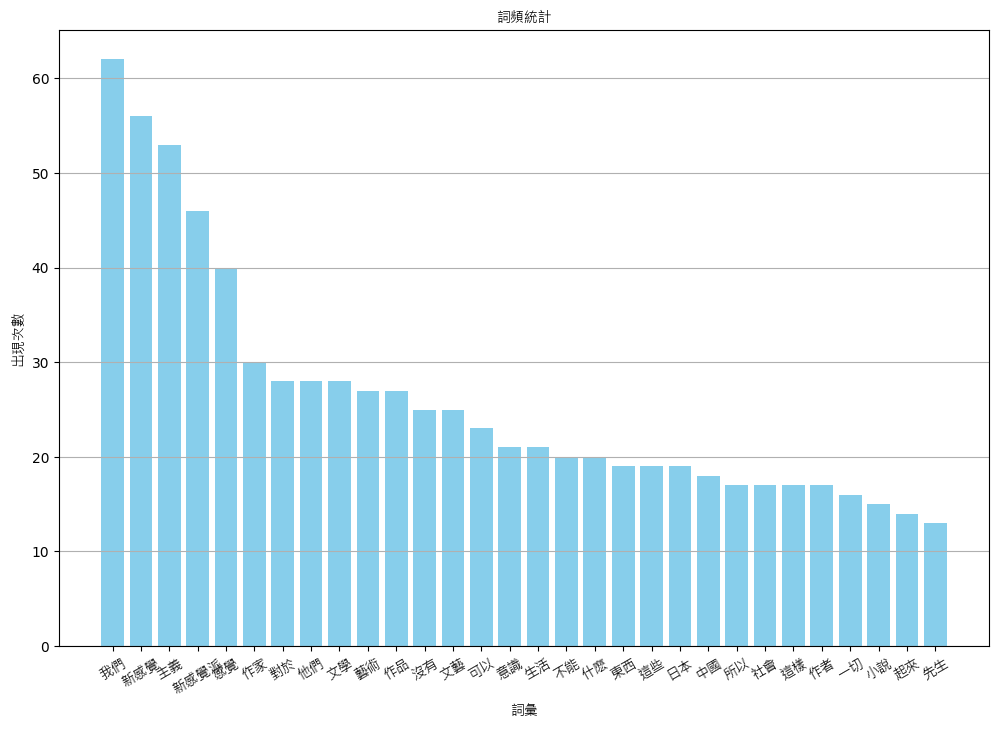

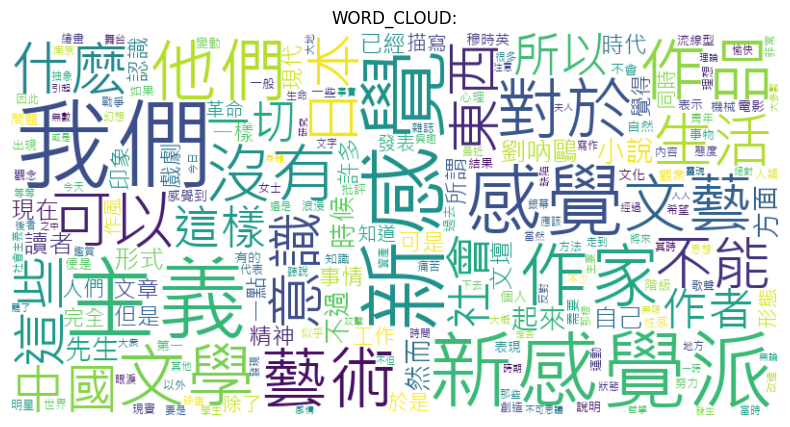

In [ ]:
from ckiptagger import WS
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
from wordcloud import WordCloud
from google.colab import files
def construct_dictionary(word_to_weight):
    """
    將詞彙權重字典轉換為 ckiptagger 接受的格式。

    Args:
        word_to_weight: 一個字典，其中鍵是詞彙，值是權重。

    Returns:
        一個列表，其中每個元素是一個包含詞彙長度和詞彙權重字典的元組。
    """
    dictionary = []
    for word, weight in word_to_weight.items():
        dictionary.append((len(word), {word: weight}))
    return dictionary

word_to_weight = {
    "感覺": 1,
    "新感覺": 2,
    "新感覺派": 3,
}
dictionary = construct_dictionary(word_to_weight)
#print(dictionary)

# 上傳文本文件
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 讀取文件內容
with open(file_name, 'r', encoding='utf-8') as file:
    text = file.read()

# 使用 CKip 分詞
segmented_words = ws(
    [text], # 將文本作為字串列表傳遞
    sentence_segmentation = True, # To consider delimiters
    segment_delimiter_set = {",", "。", ":", "?", "!", ";"}, # This is the defualt set of delimiters
    recommend_dictionary = dictionary, # words in this dictionary are encouraged

)
#print("分詞結果: ", ' | '.join(segmented_words[0])) # 訪問第一個 e

#將 CKip 的陣列改寫成如同傑巴（Jieba）的長字串
flat_list = [item for sublist in segmented_words for item in sublist] #將列表扁平化
#segmented_words_string = ' | '.join(flat_list)   # 將一維列表轉換為用特殊符號 ' | ' 分隔的長字串
#print("分詞結果: ", segmented_words_string)

# 停用詞列表（根據需要修改）
stop_words = set(['...', '..', '\n', '\n '])

# 過濾停用詞
filtered_words = [word for word in flat_list if word not in stop_words] # 使用扁平化後的列表

# 過濾掉長度小於2的詞語（根據需要調整）
filtered_words = [word for word in filtered_words if len(word) > 1]

# 保存分詞結果到新文件
output_file = "filtered_segmented_output.txt"
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(" | ".join(filtered_words))

# 計算詞頻
word_counts = Counter(filtered_words)
print(type(word_counts))
print("詞頻最高的30個詞: ", word_counts.most_common(30))

# 繪製詞頻長條圖
labels, values = zip(*word_counts.most_common(30))
plt.figure(figsize=(12, 8))  # 設置圖形大小
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=30)
plt.xlabel('詞彙',fontproperties=font_prop)
plt.ylabel('出現次數',fontproperties=font_prop)
plt.title('詞頻統計',fontproperties=font_prop)
plt.grid(axis='y')
plt.xticks(fontproperties=font_prop)
plt.show()

#生成文字雲
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WORD_CLOUD:')
plt.show()

**傑巴（Jieba）斷詞結果：**

Saving 坰竘爀堤.txt to 坰竘爀堤 (1).txt
詞頻最高的30個詞:  [('感覺', 106), ('新感覺', 36), ('作家', 28), ('作品', 27), ('主義', 23), ('社會', 20), ('生活', 20), ('日本', 20), ('藝術', 20), ('文學', 18), ('文藝', 18), ('作者', 18), ('東西', 17), ('意識', 15), ('時候', 13), ('方面', 13), ('中國', 13), ('自己', 12), ('主義的', 12), ('形式', 12), ('劉吶鷗', 12), ('先生', 11), ('印象', 11), ('這個', 11), ('一點', 11), ('這是', 11), ('文壇', 11), ('起來', 10), ('所謂', 10), ('出來', 10)]


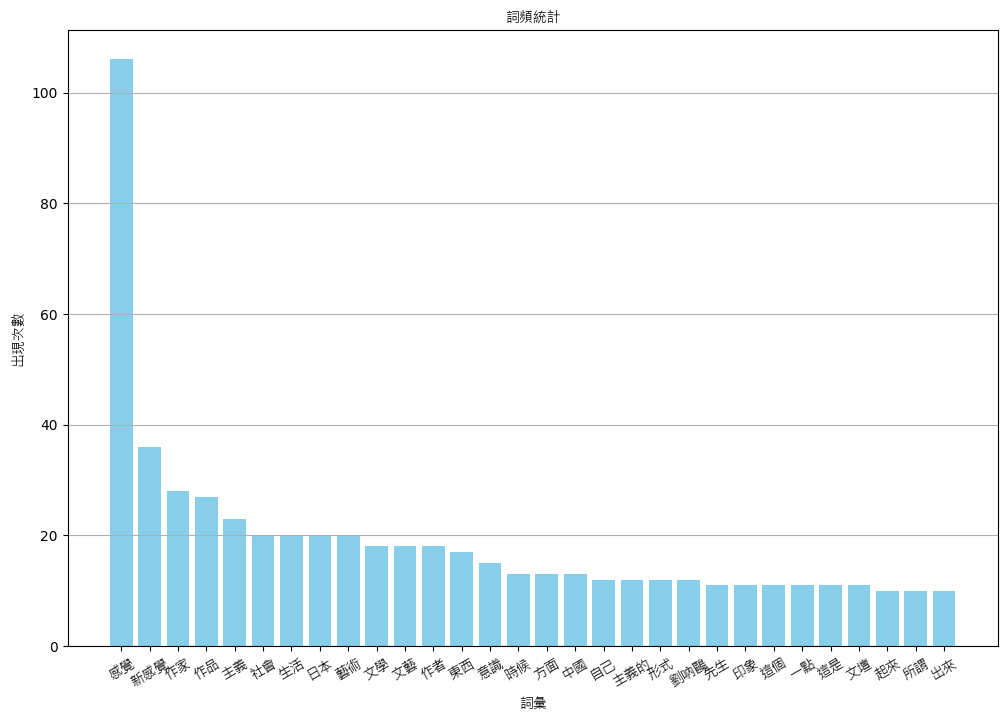

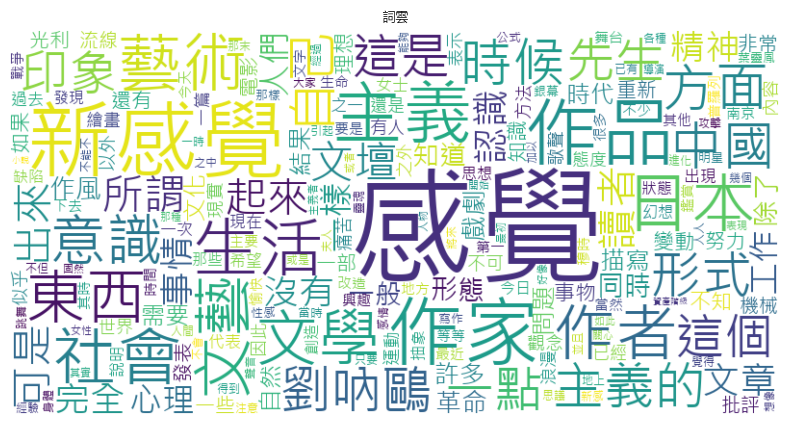

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import jieba
from collections import Counter
from wordcloud import WordCloud
from google.colab import files

# 上傳文本文件
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 讀取文件內容
with open(file_name, 'r', encoding='utf-8') as file:
    text = file.read()

# 打印內容確認
#print(text)

# 使用 Jieba 分詞
segmented_words = jieba.lcut(text)
#print("分詞結果: ", " | ".join(segmented_words))

# 停用詞列表（根據需要修改）
stop_words = set(['...', '..', '\n', '我們', '一個', '一種', '他們', '不是', '可以', '就是', '這種', '不能', '這些', '所以', '這樣', '一切', '不過', '然而', '便是', '但是'])

# 過濾停用詞
filtered_words = [word for word in segmented_words if word not in stop_words]

# 過濾掉長度小於2的詞語（根據需要調整）
filtered_words = [word for word in filtered_words if len(word) > 1]

# 保存分詞結果到新文件
output_file = "filtered_segmented_output.txt"
with open(output_file, 'w', encoding='utf-8') as file:
    file.write(" | ".join(filtered_words))

# 計算詞頻
word_counts = Counter(filtered_words)
print("詞頻最高的30個詞: ", word_counts.most_common(30))

# 繪製詞頻長條圖
labels, values = zip(*word_counts.most_common(30))
plt.figure(figsize=(12, 8))  # 設置圖形大小
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=30)
plt.xlabel('詞彙',fontproperties=font_prop)
plt.ylabel('出現次數',fontproperties=font_prop)
plt.title('詞頻統計',fontproperties=font_prop)
plt.grid(axis='y')
plt.xticks(fontproperties=font_prop)
plt.show()

# 生成詞雲圖
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('詞雲',fontproperties=font_prop)
plt.show()